In [5]:
# Load all depths and calculate mean metrics across all runs for each depth
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))

import pickle
import numpy as np

results_dir = '../results_losses_moon'

# Define depths and loss types to analyze
depths = [1, 2, 3, 4, 5, 6, 7, 8]
loss_types = ["hilbert_schmidt", "pre_determine_inner", "log_likelihood_macro"]

depth_loss_results = {}

for depth in depths:
    depth_loss_results[depth] = {}
    
    for loss_type in loss_types:
        # Filter TQFM pickle files for this depth and loss type
        pattern = f'tqfm_{loss_type}_depth{depth}_'
        tqfm_files = [f for f in os.listdir(results_dir) if f.endswith('.pkl') and pattern in f]
        
        if not tqfm_files:
            print(f"No files found for depth {depth}, loss {loss_type}")
            continue
        
        # Load all models for this depth and loss type
        models_data = []
        for tqfm_file in sorted(tqfm_files):
            try:
                with open(os.path.join(results_dir, tqfm_file), 'rb') as f:
                    tqfm = pickle.load(f)
                    
                    # Skip if best_params is None
                    if tqfm.best_params is None:
                        print(f"  Skipping {tqfm_file}: best_params is None")
                        continue
                    
                    final_loss = tqfm.loss_history[-1] if len(tqfm.loss_history) > 0 else None
                    train_acc = tqfm.train_accuracy_history[-1] if tqfm.train_accuracy_history else None
                    
                    if final_loss is not None and train_acc is not None:
                        models_data.append({
                            'tqfm': tqfm,
                            'file': tqfm_file,
                            'loss': final_loss,
                            'train_acc': train_acc
                        })
            except Exception as e:
                print(f"  Error loading {tqfm_file}: {e}")
        
        if models_data:
            # Calculate mean metrics across all valid runs
            mean_loss = np.mean([m['loss'] for m in models_data])
            std_loss = np.std([m['loss'] for m in models_data])
            mean_train_acc = np.mean([m['train_acc'] for m in models_data])
            std_train_acc = np.std([m['train_acc'] for m in models_data])
            
            depth_loss_results[depth][loss_type] = {
                'mean_loss': mean_loss,
                'std_loss': std_loss,
                'mean_train_acc': mean_train_acc,
                'std_train_acc': std_train_acc,
                'n_runs': len(models_data),
                'models': models_data
            }
            
            print(f"Depth {depth}, {loss_type}: {len(models_data)} valid runs")
            print(f"  Mean Loss: {mean_loss:.6f} ± {std_loss:.6f}")
            print(f"  Mean Train Acc: {mean_train_acc:.4f} ± {std_train_acc:.4f}")

print(f"\nTotal depths analyzed: {len(depth_loss_results)}")
print(f"Loss types: {loss_types}")

Depth 1, hilbert_schmidt: 20 valid runs
  Mean Loss: 0.765750 ± 0.029177
  Mean Train Acc: 0.9595 ± 0.0361
Depth 1, pre_determine_inner: 20 valid runs
  Mean Loss: 0.284614 ± 0.055462
  Mean Train Acc: 0.8700 ± 0.0795
Depth 1, log_likelihood_macro: 20 valid runs
  Mean Loss: 0.440687 ± 0.106870
  Mean Train Acc: 0.8905 ± 0.0723
Depth 2, hilbert_schmidt: 20 valid runs
  Mean Loss: 0.705229 ± 0.026918
  Mean Train Acc: 0.9870 ± 0.0127
Depth 2, pre_determine_inner: 20 valid runs
  Mean Loss: 0.218841 ± 0.041402
  Mean Train Acc: 0.9280 ± 0.0685
Depth 2, log_likelihood_macro: 20 valid runs
  Mean Loss: 0.288337 ± 0.105631
  Mean Train Acc: 0.9720 ± 0.0244
Depth 3, hilbert_schmidt: 20 valid runs
  Mean Loss: 0.669934 ± 0.016317
  Mean Train Acc: 0.9890 ± 0.0099
Depth 3, pre_determine_inner: 20 valid runs
  Mean Loss: 0.166801 ± 0.035720
  Mean Train Acc: 0.9705 ± 0.0267
Depth 3, log_likelihood_macro: 20 valid runs
  Mean Loss: 0.237173 ± 0.070770
  Mean Train Acc: 0.9790 ± 0.0176
Depth 4, h

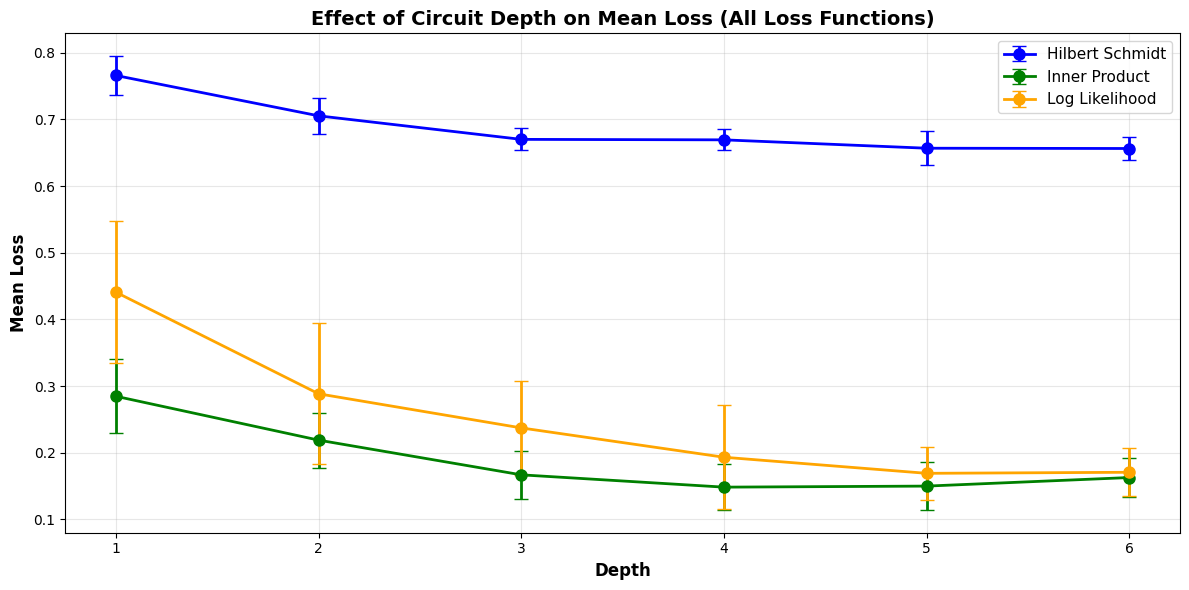

Mean Loss Summary:

HILBERT_SCHMIDT:
  Depth 1: 0.765750 ± 0.029177 (n=20)
  Depth 2: 0.705229 ± 0.026918 (n=20)
  Depth 3: 0.669934 ± 0.016317 (n=20)
  Depth 4: 0.669224 ± 0.015739 (n=20)
  Depth 5: 0.656659 ± 0.025827 (n=20)
  Depth 6: 0.656242 ± 0.017284 (n=20)

PRE_DETERMINE_INNER:
  Depth 1: 0.284614 ± 0.055462 (n=20)
  Depth 2: 0.218841 ± 0.041402 (n=20)
  Depth 3: 0.166801 ± 0.035720 (n=20)
  Depth 4: 0.148341 ± 0.034025 (n=20)
  Depth 5: 0.149911 ± 0.035885 (n=20)
  Depth 6: 0.162743 ± 0.029645 (n=20)

LOG_LIKELIHOOD_MACRO:
  Depth 1: 0.440687 ± 0.106870 (n=20)
  Depth 2: 0.288337 ± 0.105631 (n=20)
  Depth 3: 0.237173 ± 0.070770 (n=20)
  Depth 4: 0.193188 ± 0.078202 (n=20)
  Depth 5: 0.169071 ± 0.039373 (n=20)
  Depth 6: 0.170630 ± 0.036186 (n=20)


In [6]:
# Visualize Mean Loss vs Depth for all loss types
import matplotlib.pyplot as plt
import numpy as np

depths_list = sorted([d for d in depth_loss_results.keys() if depth_loss_results[d]])

plt.figure(figsize=(12, 6))

colors = {'hilbert_schmidt': 'blue', 'pre_determine_inner': 'green', 'log_likelihood_macro': 'orange'}
labels = {'hilbert_schmidt': 'Hilbert Schmidt', 'pre_determine_inner': 'Inner Product', 'log_likelihood_macro': 'Log Likelihood'}
loss_types = ["hilbert_schmidt", "pre_determine_inner", "log_likelihood_macro"]

	
for loss_type in loss_types:
    losses = []
    stds = []
    valid_depths = []
    
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            losses.append(depth_loss_results[d][loss_type]['mean_loss'])
            stds.append(depth_loss_results[d][loss_type]['std_loss'])
            valid_depths.append(d)
    
    if losses:
        plt.errorbar(valid_depths, losses, yerr=stds, marker='o', linestyle='-', 
                    linewidth=2, markersize=8, capsize=5, 
                    label=labels[loss_type],
                    color=colors[loss_type])

plt.xlabel('Depth', fontsize=12, fontweight='bold')
plt.ylabel('Mean Loss', fontsize=12, fontweight='bold')
plt.title('Effect of Circuit Depth on Mean Loss (All Loss Functions)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(depths_list)
plt.tight_layout()
plt.show()

print("Mean Loss Summary:")
for loss_type in loss_types:
    print(f"\n{loss_type.upper()}:")
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            result = depth_loss_results[d][loss_type]
            print(f"  Depth {d}: {result['mean_loss']:.6f} ± {result['std_loss']:.6f} (n={result['n_runs']})")

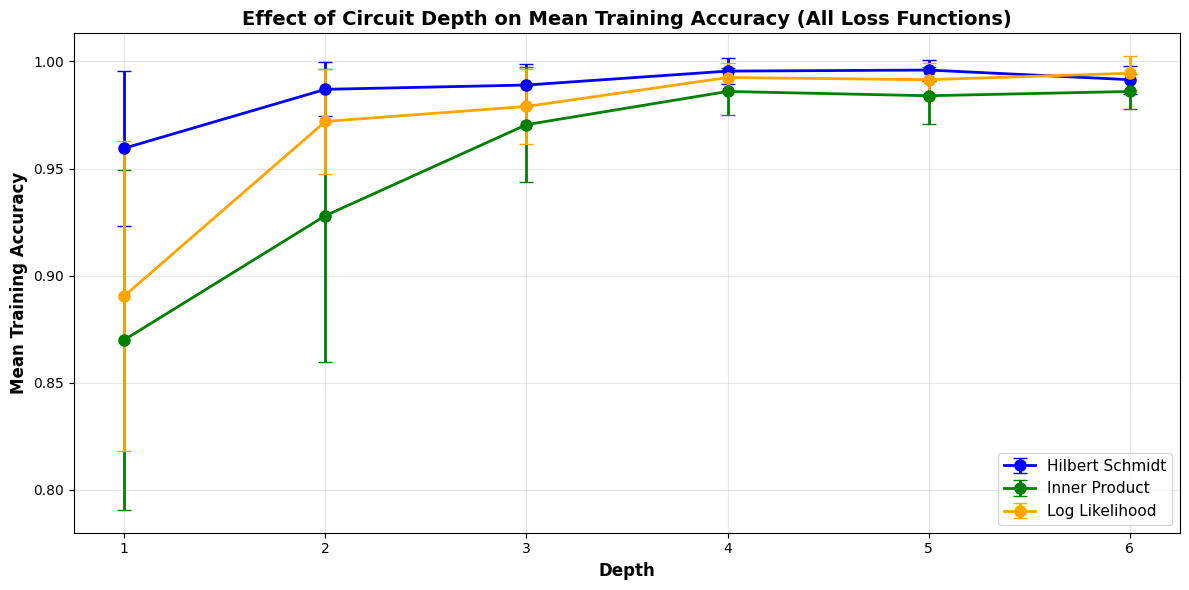


Mean Training Accuracy Summary:

HILBERT_SCHMIDT:
  Depth 1: 0.9595 ± 0.0361 (n=20)
  Depth 2: 0.9870 ± 0.0127 (n=20)
  Depth 3: 0.9890 ± 0.0099 (n=20)
  Depth 4: 0.9955 ± 0.0059 (n=20)
  Depth 5: 0.9960 ± 0.0049 (n=20)
  Depth 6: 0.9915 ± 0.0065 (n=20)

PRE_DETERMINE_INNER:
  Depth 1: 0.8700 ± 0.0795 (n=20)
  Depth 2: 0.9280 ± 0.0685 (n=20)
  Depth 3: 0.9705 ± 0.0267 (n=20)
  Depth 4: 0.9860 ± 0.0111 (n=20)
  Depth 5: 0.9840 ± 0.0132 (n=20)
  Depth 6: 0.9860 ± 0.0080 (n=20)

LOG_LIKELIHOOD_MACRO:
  Depth 1: 0.8905 ± 0.0723 (n=20)
  Depth 2: 0.9720 ± 0.0244 (n=20)
  Depth 3: 0.9790 ± 0.0176 (n=20)
  Depth 4: 0.9925 ± 0.0070 (n=20)
  Depth 5: 0.9915 ± 0.0079 (n=20)
  Depth 6: 0.9945 ± 0.0080 (n=20)


In [7]:
# Visualize Mean Training Accuracy vs Depth for all loss types
depths_list = sorted([d for d in depth_loss_results.keys() if depth_loss_results[d]])

plt.figure(figsize=(12, 6))

colors = {'hilbert_schmidt': 'blue', 'pre_determine_inner': 'green', 'log_likelihood_macro': 'orange'}
labels = {'hilbert_schmidt': 'Hilbert Schmidt', 'pre_determine_inner': 'Inner Product', 'log_likelihood_macro': 'Log Likelihood'}
loss_types = ["hilbert_schmidt", "pre_determine_inner", "log_likelihood_macro"]



for loss_type in loss_types:
    train_accs = []
    stds = []
    valid_depths = []
    
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            train_accs.append(depth_loss_results[d][loss_type]['mean_train_acc'])
            stds.append(depth_loss_results[d][loss_type]['std_train_acc'])
            valid_depths.append(d)
    
    if train_accs:
        plt.errorbar(valid_depths, train_accs, yerr=stds, marker='o', linestyle='-', 
                    linewidth=2, markersize=8, capsize=5,
                    label=labels[loss_type],
                    color=colors[loss_type])

plt.xlabel('Depth', fontsize=12, fontweight='bold')
plt.ylabel('Mean Training Accuracy', fontsize=12, fontweight='bold')
plt.title('Effect of Circuit Depth on Mean Training Accuracy (All Loss Functions)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(depths_list)
plt.tight_layout()
plt.show()

print("\nMean Training Accuracy Summary:")
for loss_type in loss_types:
    print(f"\n{loss_type.upper()}:")
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            result = depth_loss_results[d][loss_type]
            print(f"  Depth {d}: {result['mean_train_acc']:.4f} ± {result['std_train_acc']:.4f} (n={result['n_runs']})")

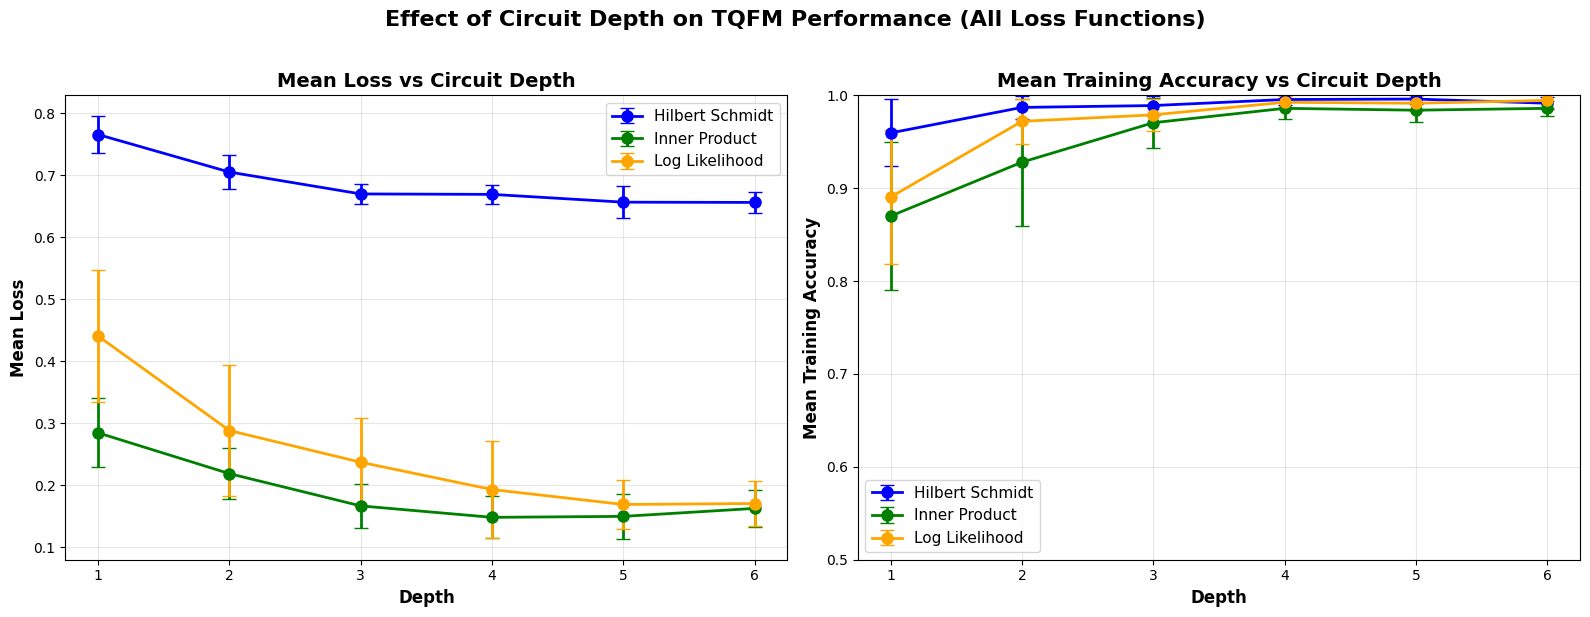

In [8]:
# Combined visualization: Mean Loss and Mean Accuracy for all loss types
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

depths_list = sorted([d for d in depth_loss_results.keys() if depth_loss_results[d]])
colors = {'hilbert_schmidt': 'blue', 'pre_determine_inner': 'green', 'log_likelihood_macro': 'orange'}
labels = {'hilbert_schmidt': 'Hilbert Schmidt', 'pre_determine_inner': 'Inner Product', 'log_likelihood_macro': 'Log Likelihood'}
loss_types = ["hilbert_schmidt", "pre_determine_inner", "log_likelihood_macro"]

# Left plot: Mean Loss vs Depth
for loss_type in loss_types:
    if loss_type not in colors:
        continue
    
    losses = []
    stds = []
    valid_depths = []
    
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            losses.append(depth_loss_results[d][loss_type]['mean_loss'])
            stds.append(depth_loss_results[d][loss_type]['std_loss'])
            valid_depths.append(d)
    
    if losses:
        ax1.errorbar(valid_depths, losses, yerr=stds, marker='o', linestyle='-',
                    linewidth=2, markersize=8, capsize=5,
                    label=labels[loss_type],
                    color=colors[loss_type])

ax1.set_xlabel('Depth', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Loss', fontsize=12, fontweight='bold')
ax1.set_title('Mean Loss vs Circuit Depth', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(depths_list)

# Right plot: Mean Training Accuracy vs Depth
for loss_type in loss_types:
    if loss_type not in colors:
        continue
    train_accs = []
    stds = []
    valid_depths = []
    
    for d in depths_list:
        if loss_type in depth_loss_results[d]:
            train_accs.append(depth_loss_results[d][loss_type]['mean_train_acc'])
            stds.append(depth_loss_results[d][loss_type]['std_train_acc'])
            valid_depths.append(d)
    
    if train_accs:
        ax2.errorbar(valid_depths, train_accs, yerr=stds, marker='o', linestyle='-',
                    linewidth=2, markersize=8, capsize=5,
                    label=labels[loss_type],
                    color=colors[loss_type])

ax2.set_xlabel('Depth', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Training Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Mean Training Accuracy vs Circuit Depth', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(depths_list)
ax2.set_ylim([0.5, 1.0])

plt.suptitle('Effect of Circuit Depth on TQFM Performance (All Loss Functions)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Depth 1, Hilbert Schmidt: 20 runs
  Mean Time: 228.05s ± 49.15s (3.80 min)
Depth 1, Inner Product: 20 runs
  Mean Time: 149.23s ± 76.69s (2.49 min)
Depth 1, Log Likelihood: 20 runs
  Mean Time: 140.76s ± 62.45s (2.35 min)
Depth 2, Hilbert Schmidt: 20 runs
  Mean Time: 269.43s ± 12.45s (4.49 min)
Depth 2, Inner Product: 20 runs
  Mean Time: 270.90s ± 8.46s (4.51 min)
Depth 2, Log Likelihood: 20 runs
  Mean Time: 272.12s ± 9.98s (4.54 min)
Depth 3, Hilbert Schmidt: 20 runs
  Mean Time: 366.06s ± 83.55s (6.10 min)
Depth 3, Inner Product: 20 runs
  Mean Time: 361.11s ± 69.61s (6.02 min)
Depth 3, Log Likelihood: 20 runs
  Mean Time: 366.67s ± 82.47s (6.11 min)
Depth 4, Hilbert Schmidt: 20 runs
  Mean Time: 439.13s ± 96.34s (7.32 min)
Depth 4, Inner Product: 20 runs
  Mean Time: 441.29s ± 96.95s (7.35 min)
Depth 4, Log Likelihood: 20 runs
  Mean Time: 439.93s ± 100.12s (7.33 min)
Depth 5, Hilbert Schmidt: 20 runs
  Mean Time: 567.05s ± 170.20s (9.45 min)
Depth 5, Inner Product: 20 runs
  Mea

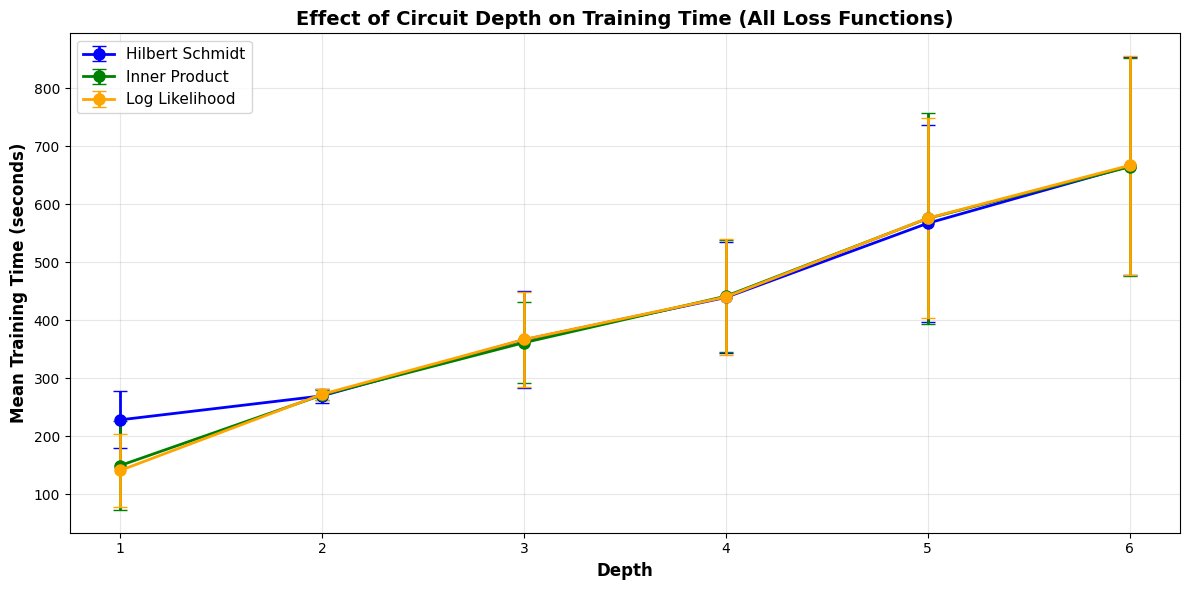


TRAINING TIME SUMMARY (seconds)
Depth   Hilbert Schmidt          Inner Product            Log Likelihood           
--------------------------------------------------------------------------------
1       228.1 ± 49.2             149.2 ± 76.7             140.8 ± 62.5             
2       269.4 ± 12.5             270.9 ± 8.5              272.1 ± 10.0             
3       366.1 ± 83.6             361.1 ± 69.6             366.7 ± 82.5             
4       439.1 ± 96.3             441.3 ± 96.9             439.9 ± 100.1            
5       567.0 ± 170.2            575.4 ± 181.5            575.8 ± 172.7            
6       665.6 ± 187.7            664.4 ± 188.2            666.8 ± 188.7            


In [11]:
# Analyze Training Time for all loss types across depths
import json
import glob

results_dir = '../results_losses_moon'
depths = [1, 2, 3, 4, 5, 6]
loss_types = ["hilbert_schmidt", "pre_determine_inner", "log_likelihood_macro"]
labels = {'hilbert_schmidt': 'Hilbert Schmidt', 'pre_determine_inner': 'Inner Product', 'log_likelihood_macro': 'Log Likelihood'}
colors = {'hilbert_schmidt': 'blue', 'pre_determine_inner': 'green', 'log_likelihood_macro': 'orange'}

# Collect training times
depth_time_results = {}

for depth in depths:
    depth_time_results[depth] = {}
    
    # Find all training_times JSON files for this depth
    pattern = f'{results_dir}/training_times_depth{depth}_*.json'
    time_files = glob.glob(pattern)
    
    if not time_files:
        print(f"No training time files found for depth {depth}")
        continue
    
    # Collect times for each loss type
    times_by_loss = {loss: [] for loss in loss_types}
    
    for time_file in time_files:
        try:
            with open(time_file, 'r') as f:
                data = json.load(f)
                individual_times = data.get('individual_training_times', {})
                
                for loss_type in loss_types:
                    if loss_type in individual_times:
                        times_by_loss[loss_type].append(individual_times[loss_type])
        except Exception as e:
            print(f"  Error loading {time_file}: {e}")
    
    # Calculate mean and std for each loss type
    for loss_type in loss_types:
        if times_by_loss[loss_type]:
            mean_time = np.mean(times_by_loss[loss_type])
            std_time = np.std(times_by_loss[loss_type])
            depth_time_results[depth][loss_type] = {
                'mean_time': mean_time,
                'std_time': std_time,
                'n_runs': len(times_by_loss[loss_type]),
                'all_times': times_by_loss[loss_type]
            }
            print(f"Depth {depth}, {labels[loss_type]}: {len(times_by_loss[loss_type])} runs")
            print(f"  Mean Time: {mean_time:.2f}s ± {std_time:.2f}s ({mean_time/60:.2f} min)")

# Visualize Training Time vs Depth
plt.figure(figsize=(12, 6))

for loss_type in loss_types:
    times = []
    stds = []
    valid_depths = []
    
    for d in depths:
        if d in depth_time_results and loss_type in depth_time_results[d]:
            times.append(depth_time_results[d][loss_type]['mean_time'])
            stds.append(depth_time_results[d][loss_type]['std_time'])
            valid_depths.append(d)
    
    if times:
        plt.errorbar(valid_depths, times, yerr=stds, marker='o', linestyle='-', 
                    linewidth=2, markersize=8, capsize=5, 
                    label=labels[loss_type],
                    color=colors[loss_type])

plt.xlabel('Depth', fontsize=12, fontweight='bold')
plt.ylabel('Mean Training Time (seconds)', fontsize=12, fontweight='bold')
plt.title('Effect of Circuit Depth on Training Time (All Loss Functions)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(depths)
plt.tight_layout()
plt.show()

# Print summary table
print("\n" + "="*80)
print("TRAINING TIME SUMMARY (seconds)")
print("="*80)
print(f"{'Depth':<8}", end="")
for loss_type in loss_types:
    print(f"{labels[loss_type]:<25}", end="")
print()
print("-"*80)

for d in depths:
    print(f"{d:<8}", end="")
    for loss_type in loss_types:
        if d in depth_time_results and loss_type in depth_time_results[d]:
            result = depth_time_results[d][loss_type]
            print(f"{result['mean_time']:.1f} ± {result['std_time']:.1f}".ljust(25), end="")
        else:
            print("N/A".ljust(25), end="")
    print()
print("="*80)